# To jest moja analiza tego jak ludzie piją

Jest super. Fjanie.

In [13]:
import pandas as pd

narko = pd.read_csv('data/drugs/drugs.csv')

In [2]:
narko

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


## `pandas` - tworzenie nowych kolumn

**Problem**: Przeciętnie, jak często w ciągu ostatniego roku _osoby niepełnoletnie_ piły alkohol?

**Rozwiązanie**: Mamy mediany częstości spożycia alkoholu we wszystkich grupach wiekowych. Mamy też liczebności poszczególnych grup. Musimy obliczyć średnią ważoną spożycia alkoholu, gdzie naszymi wagami są liczebności w grupach "niepełnoletnich". (Uwaga! Rozwiązanie jest dość przybliżone, bo tak na prawdę sumujemy mediany, ale da nam to jakiś pogląd).

Zacznijmy od stworzenia zmiennej, w której przechowamy tabelę z samymi niepełnoletnimi (`np`).

In [21]:
np = narko[:6].copy()
np

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,n_x_alc
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0,8394.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0,16542.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5,13960.0
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0,17736.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0,30580.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5,39494.0


Teraz możemy stworzyć kolumnę, w której będziemy przechowywać dla każdego wiersza wynik mnożenia `n * alcohol-frequency`. Naszą nową kolumnę nazwiemy `n_x_alc`.

In [22]:
np['n_x_alc'] = np['n'] * np['alcohol-frequency']

Sprawdźmy teraz, jak wygląda nasza nowa kolumna. Wyświetlimy ją razem z kolumną `n` i `alcohol-frequency`.

In [24]:
np[['n', 'alcohol-frequency', 'n_x_alc']]

,n,alcohol-frequency,n_x_alc
0,2798,3.0,8394.0
1,2757,6.0,16542.0
2,2792,5.0,13960.0
3,2956,6.0,17736.0
4,3058,10.0,30580.0
5,3038,13.0,39494.0


Widzimy "na oko", że nasze mnożenie się powiodło. Policzymy teraz sumę `n_x_alc` i podzielimy przez sumę `n`. Powinno nam to dać średnią, o którą chodzi.

In [26]:
np['n_x_alc'].sum() / np['n'].sum()

7.28237255014656

Wydaje się, że przeciętny _niepełnoletni_ pije alkohol trochę ponad **7 razy w roku**.

## `pandas` - szukanie wartości maksymalnych i sortowanie

**Problem**: w których przedziałach wiekowych jest najwięcej ludzi palących marihuanę.

**Rozwiązanie**: możemy podejść do problemu na dwa sposoby:

1. Znajdźmy najwyższą (maksymalną) wartość zmiennej `marijuana-use` i dowiedzmy się, jaki jest indeks wiersza tabeli, w której ta wartość się znajduje:

In [27]:
indeks_najwiekszej = narko['marijuana-use'].idxmax()
indeks_najwiekszej

8

Wynika z tego, że najwyższa wartość znajduje się w rzędzie o indeksie 8. Wyświetlmy teraz ten rząd korzystając z metody `iloc()`.

In [30]:
narko.iloc[indeks_najwiekszej,:]

age                            20
n                            2271
alcohol-use                  69.7
alcohol-frequency              48
marijuana-use                  34
marijuana-frequency            60
cocaine-use                   4.9
cocaine-frequency               8
crack-use                     0.6
crack-frequency                 5
heroin-use                    0.9
heroin-frequency               45
hallucinogen-use              7.4
hallucinogen-frequency          2
inhalant-use                  1.5
inhalant-frequency              4
pain-releiver-use              10
pain-releiver-frequency        10
oxycontin-use                 1.7
oxycontin-frequency            12
tranquilizer-use              5.4
tranquilizer-frequency         10
stimulant-use                   4
stimulant-frequency            12
meth-use                      0.9
meth-frequency                 12
sedative-use                  0.5
sedative-frequency              4
n_x_alc                    109008
Name: 8, dtype

Wydaje się więc, że najwięcej ludzi palących marihuanę jest w grupie 20-latków.

2. Możemy posortować cała tabelę po zmiennej 'marijuana-use'. Ułożymy w ten sposób wartości zmiennej po kolei. Aby `pandas` posortował od najwyższej do najniższej, musimy ustawić argument `ascending=False` (domyślnie `True`).

In [35]:
narko.sort_values(by='marijuana-use', ascending=False)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,n_x_alc
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0,109008.0
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0,59256.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0,80028.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0,122408.0
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0,244764.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5,39494.0
11,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5,238732.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0,30580.0
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0,136656.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0,148928.0


Druga metoda daje nam wiecej informacji. Wiemy, że zaszczytne drugie miejsce w klasyfikacji zajmują 18-latkowie a trzecie 18-latkowie. Widzimy jednocześnie, że najmniej palących marihuanę jest w grupie 12-latków i osób 65+.

## `pandas` - filtrowanie

**Problem:** chcemy dowiedzieć się, w których grupach wiekowych ponad 50% badanych piła alkohol w poprzednim roku.

**Rozwiązanie:** wyświetlmy najpierw interesującą nas kolumnę:

In [36]:
narko['alcohol-use']

0      3.9
1      8.5
2     18.1
3     29.2
4     40.1
5     49.3
6     58.7
7     64.6
8     69.7
9     83.2
10    84.2
11    83.1
12    80.7
13    77.5
14    75.0
15    67.2
16    49.3
Name: alcohol-use, dtype: float64

`pandas` pozwala nam porównać wartości z kolumn z innymi wartościami poprzez zwykłe, znane nam już operatory porównania:

In [38]:
wieksze_niz_50 = narko['alcohol-use'] > 50
wieksze_niz_50

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16    False
Name: alcohol-use, dtype: bool

Otrzymujemy kolumnę pełną wartości logicznych. Jeżeli któraś z wartości jest wyższa niż 50, w odpowiadającym jej miejscu kolumny `wieksze_niz_50` mamy wartość logiczną `True`. W przeciwnym wypadku wpisana zostanie wartość `False`.

Teraz wykonamy pewien trik. Wykorzystamy nowo utworzoną kolumnę do wybrania interesujących nas wartości.

In [39]:
narko[wieksze_niz_50]

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,n_x_alc
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0,59256.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0,80028.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0,109008.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0,122408.0
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0,244764.0
11,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5,238732.0
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0,136656.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0,148928.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0,384332.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0,203996.0


Jak to zadziałało? Wybrane zostały tylko te rzędy, które na odpowiadających im pozycjach w kolumnie `wieksze_niz_50` miały wartość `True`. 

## `pandas` - proste wykresy

Aby rysować wykresy, potrzebujemy stosownego modułu. W tym celu zaimportujemy sobie `matplotlib.pyplot`, którego alias to tradycyjnie `plt`. 

In [80]:
import matplotlib.pyplot as plt

**Problem**: chcemy zwizualizować zależność pomiędzy wiekiem a procentem ludzi używających danej substancji psychoaktywnej. Powiedzmy, że interesujemy się kokainą i amfetaminą.

**Rozwiązanie:** najprostsze wykresy w `matplotlib` rysujemy z pomocą funkcji `plt.plot()`. Musimy podać dwa argumenty - najpierw wartości na osi x a później na osi y:

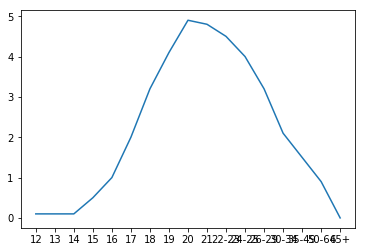

In [82]:
plt.plot(narko['age'], narko['cocaine-use'])

Bardzo ładnie, tylko trochę nam wartości osi x nachodzą na siebie. Możemy temu zaradzić za pomocą funkcji `xticks(rotation='vertical')`. Przećwiczmy to na przykładzie zależności wieku i amfetaminy:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text xticklabel objects>)

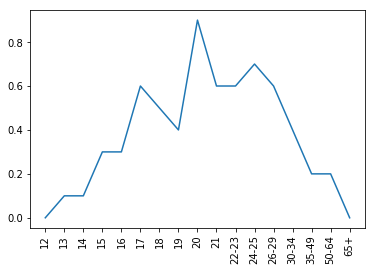

In [84]:
plt.plot(narko['age'], narko['meth-use'])
plt.xticks(rotation='vertical')